In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
def calc_instantaneous_forward_rate(t, curve):
    dt = 0.01
    forward_rate = - (np.log(curve(t+dt)) - np.log(curve(t-dt))) / (2 * dt)
    return forward_rate

### Generate Short Rate Paths using Ho-Lee Model

In [99]:
def generate_paths_HoLee_euler(no_of_paths, no_of_steps, T, ZCB_curve, sigma):

    # Calculate initial short rate at t -> 0
    r0 = calc_instantaneous_forward_rate(0.01, ZCB_curve)
    theta = lambda t: (calc_instantaneous_forward_rate(t+dt, ZCB_curve) - calc_instantaneous_forward_rate(t-dt, ZCB_curve)) / (2 * dt) + sigma ** 2 * t

    Z = np.random.normal(0.0, 1.0, [no_of_paths, no_of_steps])
    W = np.zeros([no_of_paths, no_of_steps+1])
    R = np.zeros([no_of_paths, no_of_steps+1])
    M = np.zeros([no_of_paths, no_of_steps+1])
    R[:,0] = r0
    M[:,0] = 1
    time = np.zeros([no_of_steps+1])


    dt = T / float(no_of_steps)
    for i in range(0, no_of_steps):
        Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.sqrt(dt) * Z[:,i]                                        # Simulate Brownian Motion
        R[:,i+1] = R[:,i] + theta(time[i]) * dt + sigma * (W[:,i+1] - W[:,i])           # Simulate short rate using Ho-Lee Model
        M[:,i+1] = M[:,i] * np.exp((R[:,i+1] + R[:,i])/2 * dt)                          # Simulate corresponding discount factor (Zero Coupon Bond Curve)
        time[i+1] = time[i] + dt
        
    
    paths = {'time':time, 'R':R, 'M':M}
    return paths

### Specify Parameters

In [100]:
no_of_paths = 25000
no_of_steps = 500

sigma = 0.007
T = 40

### Define Zero-Coupon-Bond Curve (Assume we get this from market data)

In [101]:
ZCB_curve = lambda T: np.exp(-0.1*T)

### Generate Zero-Coupon-Bond Curve using Ho-Lee Model

In [102]:
paths = generate_paths_HoLee_euler(no_of_paths, no_of_steps, T, ZCB_curve, sigma)
M = paths['M']
ti = paths['time']

ZCB_t = np.zeros([no_of_steps+1])
for i in range(0, no_of_steps+1):
    ZCB_t[i] = np.mean(1.0/M[:,i])

### Proving No Arbitrage Condition for under HJM Framework

Text(0.5, 1.0, 'ZCBs from Ho-Lee Model')

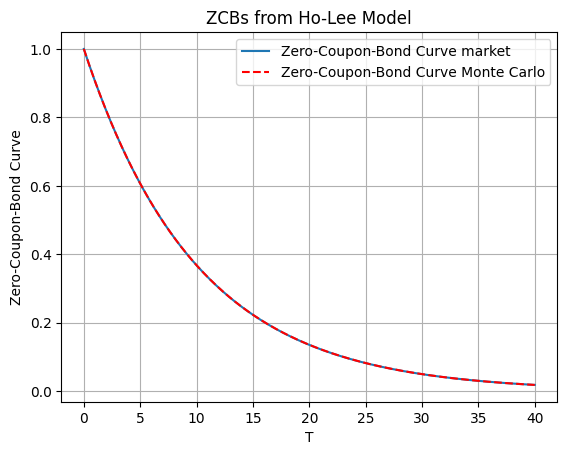

In [103]:
plt.figure(1)
plt.grid()
plt.xlabel('T')
plt.ylabel('Zero-Coupon-Bond Curve')
plt.plot(ti,ZCB_curve(ti))
plt.plot(ti,ZCB_t,'--r')
plt.legend(['Zero-Coupon-Bond Curve market','Zero-Coupon-Bond Curve Monte Carlo'])
plt.title('ZCBs from Ho-Lee Model')